In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

In [16]:
df = pd.read_csv('mintechno2.csv')
df.head()

,album,artist,country,label,year
0,Freak By Night,Cotumo,Germany,Zerinnerung,2006
1,Progress,Alexander Kowalski,Germany,Kanzleramt,2002
2,Cocoon Compilation I,Various,Germany,Cocoon Recordings,2009
3,Welcome To My Club - 1st Issue,Secret Cinema,Netherlands,Gem Records (6),2010
4,Time Axis Manipulation,Mokira,Sweden,Kontra-Musik,2011


In [17]:
df.country.value_counts().head(10).index

Index(['Germany', 'UK', 'US', 'Canada', 'France', 'Italy', 'Netherlands',
       'Belgium', 'Spain', 'Sweden'],
      dtype='object')

# First graph, looking at where the most minimal techno albums have been released

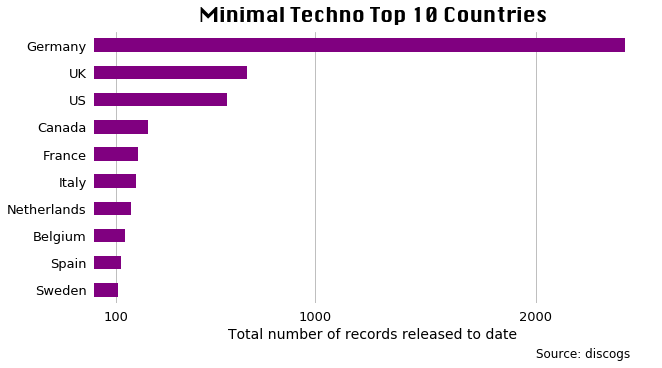

In [26]:
def get_color(country):
    if country == "Germany":
        return 'purple'
    else:
        return 'purple'

bar_colors = [get_color(name) for name in df.country.value_counts().head(10).sort_values().index]

ax = df.country.value_counts().head(10).sort_values().plot(kind='barh', x='country', figsize=(10,5), color=bar_colors)
ax.set_title('Minimal Techno Top 10 Countries',pad=10)
ax.title.set_fontsize(20)
ax.title.set_fontname("Silom")
ax.set_xticks([100,1000,2000])
ax.set_xlabel('Total number of records released to date', fontsize=14)

ax.tick_params(which='major', left=False, bottom=False, labelsize=13)
ax.grid(True, axis='x')
ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.text(2000, -2.5, 'Source: discogs', fontsize=12)

#Kewl, let's save that as a pdf.
plt.savefig('top_countries.pdf')


# Second graph, looking at total number of records released over time. Is there a trend?

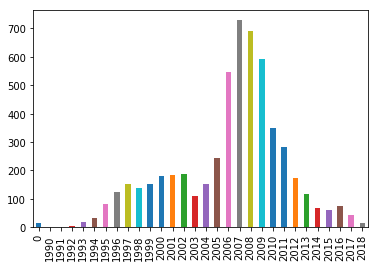

In [8]:
df.year.value_counts().sort_index().plot(kind='bar')

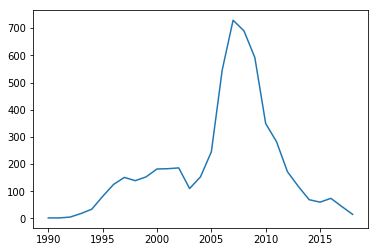

In [9]:
df[df.year != 0].year.value_counts().sort_index().plot() #getting rid of the nulls (stored as 0), allows for line plot.

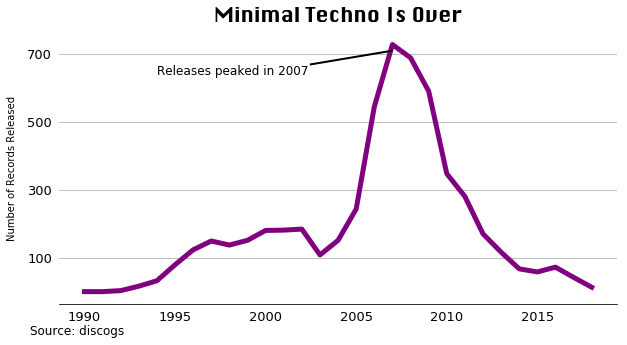

In [25]:
ax = df[df.year != 0].year.value_counts().sort_index().plot(figsize=(10,5), color='purple', linewidth=5)
ax.set_title('Minimal Techno Is Over',pad=10)
ax.title.set_fontsize(20)
ax.title.set_fontname("Silom")

ax.tick_params(which='major', left=False, bottom=False, labelsize=13)
ax.set_yticks([100,300,500,700])

ax.grid(True, axis='y')
ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
#ax.axvline(x=2007, linestyle='dashed', alpha=0.5)

ax.set_ylabel('Number of Records Released', labelpad=10)

ax.annotate('Releases peaked in 2007', fontsize=12, xy=(2007,711), xytext=(1994,640), arrowprops=dict(width=1, headwidth=1, headlength=1))

ax.text(1987, -125, 'Source: discogs', fontsize=12)

#And saving it as a pdf:
plt.savefig('over_time.pdf')